In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def extract_tensorboard_data(log_file, tag):
    l = []
    for e in tf.train.summary_iterator(log_file):
        for v in e.summary.value:
            if v.tag == tag:
                l.append(v.simple_value)

    return l


log_file = '/home/baudoin/pytorch-retinanet-pipeline/results/training_results/20211221-160039/events.out.tfevents.1640098839.v4rl-gpu.8248.0'
tag = 'Train_Loss/Iteration'

loss_retinanet_superpoint = extract_tensorboard_data(log_file, tag)

log_file = '/home/baudoin/pytorch-retinanet/results/training_results/20220105-095116/events.out.tfevents.1641372676.v4rl-gpu.4299.0'
tag = 'Train_Loss/Iteration'
loss_retinanet = extract_tensorboard_data(log_file, tag)

In [21]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

Text(0.5, 0, 'iteration')

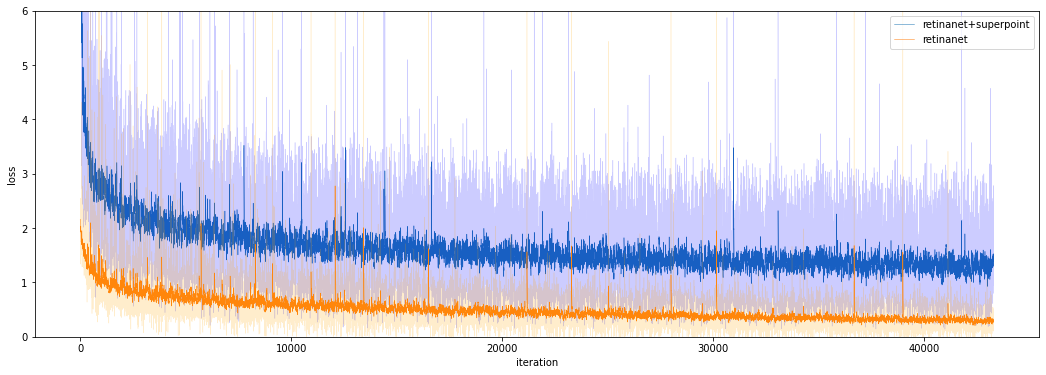

In [48]:
plt.figure(figsize=(18,6))
plt.plot(smooth(loss_retinanet_superpoint[:len(loss_retinanet)], 0.9), label='retinanet+superpoint', linewidth=0.5)
plt.plot(loss_retinanet_superpoint[:len(loss_retinanet)], alpha = 0.2, color='blue', linewidth=0.5)
plt.plot(smooth(loss_retinanet, 0.9), label='retinanet', linewidth=0.5)
plt.plot(loss_retinanet, alpha = 0.2, color='orange', linewidth=0.5)
plt.legend()
plt.ylim((0,6))
plt.ylabel('loss')
plt.xlabel('iteration')

<BarContainer object of 10 artists>

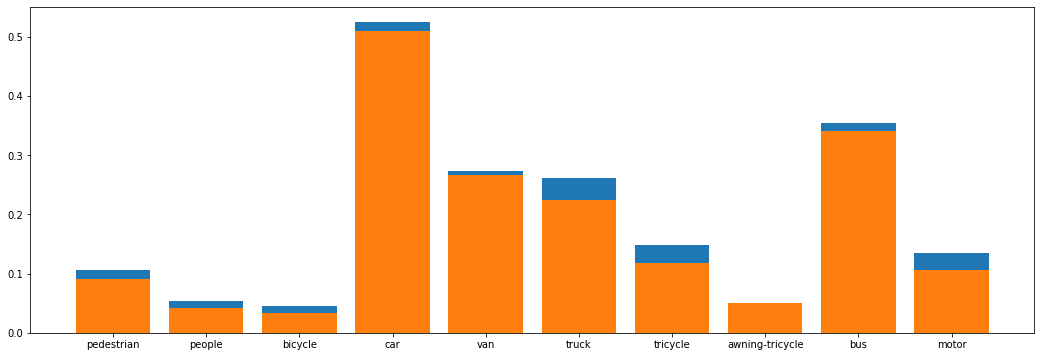

In [62]:
class_labels = ['pedestrian','people','bicycle','car','van', 'truck', 'tricycle','awning-tricycle','bus','motor']

mAP_retinanet_superpoint =[0.09107286840459378,0.04126911667788177, 0.03266346353291075, 0.5095369533832859, 0.2657046543795841, 0.22405391674606356, 0.11726151036818033, 0.05030014054614983, 0.3411728263244817, 0.1056611451620531]
mAP_retinanet = [0.1060783816806159,0.05364209761883679,0.04575904962632109,0.5245638776128224,0.27353077117554425,0.26142337396442344,0.1476122751726628,0.05101229391559008,0.3534836355385971,0.13426770684806646]

plt.figure(figsize=(18,6))

plt.bar(labels,mAP_retinanet)
plt.bar(labels,mAP_retinanet_superpoint)


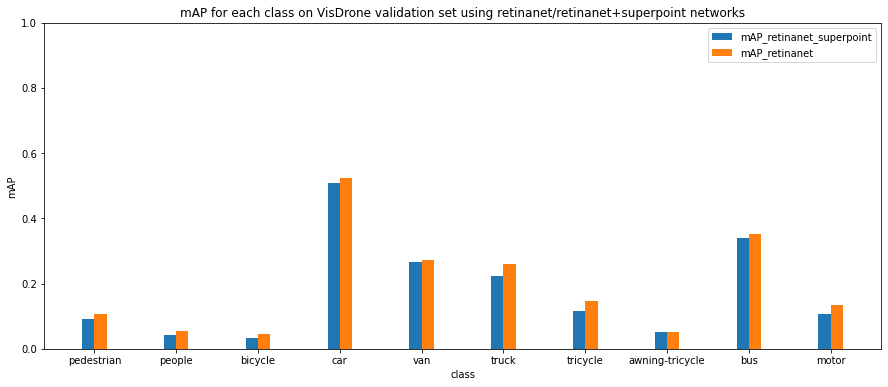

In [84]:
# Comparison baseline/superpoint using last models over 10 epochs training

import numpy as np
def subcategorybar(X, vals, labels, width=0.3):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(15,6))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=labels[i])   
    plt.xticks(_X, X)
    plt.legend()
    plt.ylim((0,1))
    plt.xlabel('class')
    plt.ylabel('mAP')
    plt.title('mAP for each class on VisDrone validation set using retinanet/retinanet+superpoint networks')
    plt.show()

labels=['mAP_retinanet_superpoint', 'mAP_retinanet']
subcategorybar(class_labels, [mAP_retinanet_superpoint,mAP_retinanet], labels)


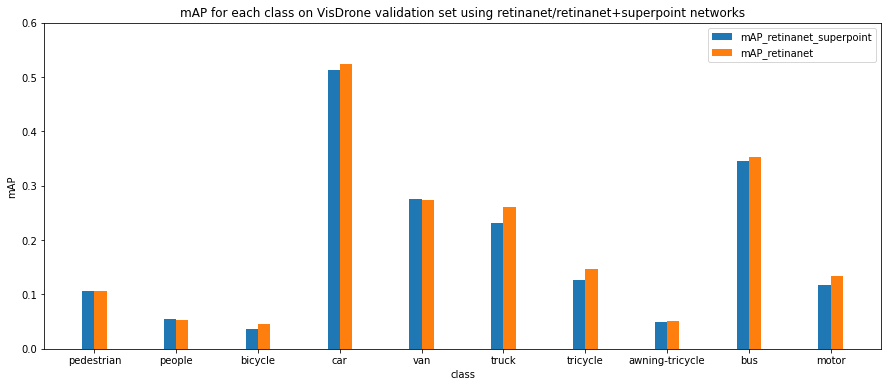

In [13]:
# Comparison baseline/superpoint using best models over 20 epochs training

import numpy as np
def subcategorybar(X, vals, labels, width=0.3):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(15,6))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=labels[i])   
    plt.xticks(_X, X)
    plt.legend()
    plt.ylim((0,0.6))
    plt.xlabel('class')
    plt.ylabel('mAP')
    plt.title('mAP for each class on VisDrone validation set using retinanet/retinanet+superpoint networks')
    plt.show()

class_labels = ['pedestrian','people','bicycle','car','van', 'truck', 'tricycle','awning-tricycle','bus','motor']

mAP_retinanet_superpoint_best = [0.10565774719469202, 0.0554026436251659, 0.03705378733380764, 0.5126053244144212 ,0.2751387399449972, 0.23166499592899542, 0.12637880976618981, 0.04982380642475113, 0.3462976806779955, 0.11755469440426741]
mAP_retinanet_best = [0.1060783816806159,0.05364209761883679,0.04575904962632109,0.5245638776128224,0.27353077117554425,0.26142337396442344,0.1476122751726628,0.05101229391559008,0.3534836355385971,0.13426770684806646]

labels=['mAP_retinanet_superpoint', 'mAP_retinanet']
subcategorybar(class_labels, [mAP_retinanet_superpoint_best,mAP_retinanet_best], labels)
